In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import matplotlib
import xarray as xr
import numpy as np
import cartopy.crs as ccrs

import random

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, FFMpegWriter

from pathlib import Path

import sys
sys.path.append("..")

import flutter


In [2]:
flutter.test_import()

Package flutter imported!


In [21]:
dir_data = Path("../data/reduced")
# dir_fig = Path("../fig")
dir_fig = Path("../data/fig")
dir_vid = dir_fig/ "vid"

f_var_fun = lambda var : f"hundred_members_{var}_pf.nc"
f_var = {var:f_var_fun(var) for var in
    ["2t",
    "msl",
    "10fg",
    "tp"]}

In [8]:
figsize = (6,5)
# matplotlib.rcParams['figure.figsize'] = figsize


In [10]:
filename = dir_data/f_var["2t"]

In [11]:
da = xr.load_dataset(filename)
da = da.assign_coords({"longitude": [ i if i <= 180 else i-360 for i in da.longitude.values]})
# reduce spatial range
da_small=da.sel(longitude=slice(-20,20),latitude=slice(50,40))
da = da.sel(longitude=slice(-20,20),latitude=slice(65,35))


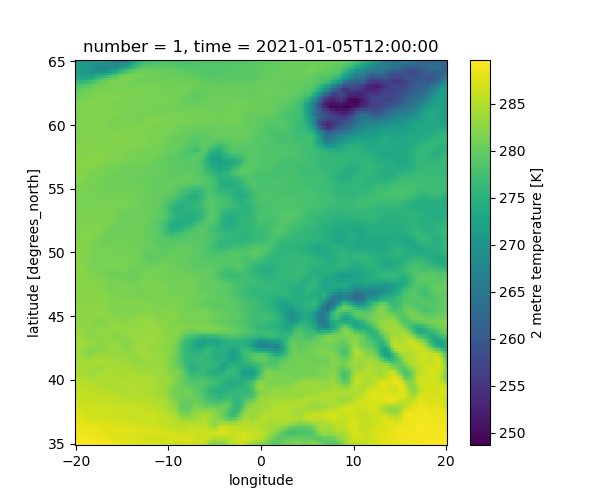

In [12]:
da.sel(number=1).isel(time=1).t2m.plot(figsize=figsize)

In [13]:
da_mean = da.mean(dim="number")

In [14]:
# ## Animation 
# # simple temperature (5 repeat)

# Ns=[10,20,50,100]# 100
# n_repetitions = 5

# for N in Ns:
#     plt.close()
#     fig, ax = plt.subplots()

#     artists = []
#     for E in range(1,101,100//N):
#         # ds = (da.sel(number=E)-da_mean).isel(time=10).t2m
#         params = dict(vmin=250, vmax=290)
#         ds = da.sel(number=E).isel(time=10).t2m
#         im = ds.plot(animated=True,add_colorbar=False,**params)
#         if E==1:
#             ds.plot(**params)
#         ax.set_title(f"N_ens:{N:3}  time: {datef(ds)}")
#         artists.append([im])
#     artists = artists*n_repetitions



#     ani = ArtistAnimation(fig, artists, interval=2000//N, blit=True,
#                                     repeat_delay=1000)

#     # To save the animation, use e.g.

#     ani.save(dir_vid/f"ensembles_temp_{N}.mp4")

# # or
# #
# # writer = animation.FFMpegWriter(
# #     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# # ani.save("movie.mp4", writer=writer)

# # plt.show()

In [15]:
# ## Animation 
# # threshold temperature - freezing++

# Ns=[20,10,50,100]
# n_repetitions = 5
# temp_threshold = 268 # 273.15

# projection= ccrs.PlateCarree()
# transform = ccrs.PlateCarree()
# params = params_temp.copy()
# params['transform']=transform

# for N in Ns:
#     plt.close()

#     fig, ax = plt.subplots(subplot_kw=dict(projection=projection))
#     ax.coastlines(resolution='50m')
#     dt = da_big.isel(time=10)
#     ax.set_title(f"N_ens:{N:3}  time: {datef(dt)}")
    
#     artists = []
#     for E in range(1,101,100//N):
#         ds = dt.sel(number=E).t2m
#         ds = ds.where(ds<temp_threshold) # threshold on freezing 
        
#         im = ds.plot(animated=True,add_colorbar=False,**params)
#         if E==1:
#             ds.plot(**params)
#         artists.append([im])
#     artists = artists*n_repetitions



#     ani = ArtistAnimation(fig, artists, interval=2000//N, blit=True,
#                                     repeat_delay=1000)

#     # To save the animation, use e.g.

#     ani.save(dir_vid/f"ensembles_freezing_{N}.mp4")




In [16]:
# ## Animation temperature contours

# fig, ax = plt.subplots()

# N=50
# artists = []
# for E in range(1,101,100//N):
#     # plt.cla()
#     # ds = (da.sel(number=E)-da_mean).isel(time=10).t2m
#     params = dict()#vmin=250, vmax=290)
#     ds = da.sel(number=E).isel(time=10).t2m
#     im = ds.plot.contourf(**params,add_colorbar=False,animated=True)
#     if E==1:
#         ds.plot.contourf(**params)
#     artists.append([im])
    
# artists = artists*5

# ani = ArtistAnimation(fig, artists, interval=2000//N, blit=True,
#                                 repeat_delay=1000)

# # To save the animation, use e.g.

# ani.save(dir_vid/f"ensembles{N}_contourf.mp4")


In [17]:
# plt.close()
# number= 9
# projection= ccrs.PlateCarree()
# transform = ccrs.PlateCarree()
# fig, ax = plt.subplots(subplot_kw=dict(projection=projection))

# ds = da.sel(number=number).isel(time=10).t2m
# ds = ds.where(ds<270)
# ds.plot(ax=ax,**params_temp,transform=transform)
# ax.coastlines(resolution='50m')
# ax.set_title(f"ens:{number:3}  time: {datef(ds)}")



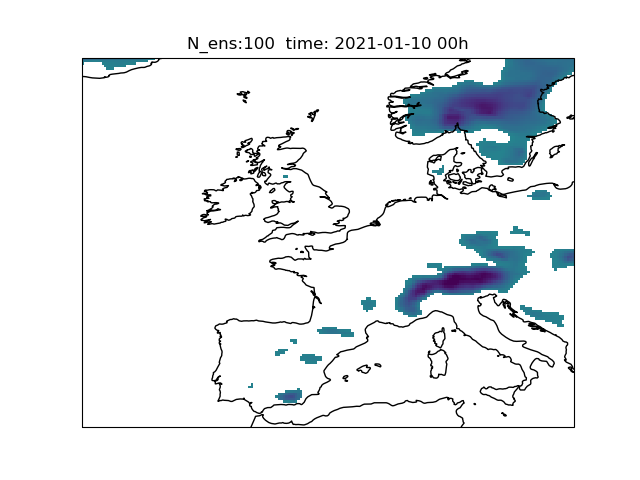

In [22]:
## Animation
# evolving timesteps 
# threshold temperature - freezing

# Es=[50]
Es=[50,100] 
# Es=[10,20,50,100]

timesteps = 5
Ts = range(0,11,11//timesteps)

n_repetitions = 2
shuffle = True

temp_threshold = 268
params_temp = dict(vmin=250, vmax=290)
# temp_threshold = 273.15 


for E in Es:
    flutter.export_flutter(da,Ts,E,
            filename=dir_vid/f"ensembles_time_freezing_T{timesteps}_{E}.mp4",
            projection= ccrs.PlateCarree(),
            transform = ccrs.PlateCarree(),
            plot_params=params_temp,
            threshold=temp_threshold,
            n_repetitions=n_repetitions, shuffle=shuffle
            )